In [81]:
#
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
import math
import time
import io
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
# ivol_sep22.csv and on
# lasep22                  is AUG 31 looking into Sep 2022 DONE 2.45   ivol2_sep22  .csv
# 2jdfoct22              is SEPT 30 looking into Oct 2022  DONE 2.8    ivol2_oct22
# looking4JDF_intonovember    is OCT looking into Nov 2022 DONE 3.73   ivol2_nov22
# lookingintoDEC22          is NOV30 looking into Dec 2022 DONE 4.08   ivol2_dec22
# lookingintoJAN23       is Dec 2022 looking into Jan 2023 DONE 4.12   ivol2_jan23
#lookingintoFEB23                    is Jan2023 into feb23 DONE 4.6    ivol2_feb23
# lookatmarfrfr23                         is Feb2023 into mar23 4.65   ivol2_mar23
ivolfiles = ['/content/drive/My Drive/ivol2_sep22.csv',
             '/content/drive/My Drive/ivol2_oct22.csv',
             '/content/drive/My Drive/ivol2_nov22.csv',
             '/content/drive/My Drive/ivol2_dec22.csv',
             '/content/drive/My Drive/ivol2_jan23.csv',
             '/content/drive/My Drive/ivol2_feb23.csv',
             '/content/drive/My Drive/ivol2_mar23.csv']
# m86weights date ticker sprc shares mktcap
Wsheet_values = [
    'aug 1',
    'sep 1',
    'oct 3',
    'nov 1',
    'dec 1',
    'jan 3',
    'feb 1']
# m86retsdata:  date ticker shareclass sprc dailyreturns
RSheet_values = [
    'aug 22',
    'sep 22',
    'oct 22',
    'nov 22',
    'dec 22',
    'jan 23',
    'feb 23']
monthcodes = [8,9,10,11,12,1,2,3]
riskfreerates = [2.45,2.8,3.73,4.08,4.12,4.6,4.65]#30d exp bond
years = [2022,2022,2022,2022,2022,2023,2023,2023]

AnalysisNumber = 0 # 0 thru 6. 2,3,4,5 is done. REDO 0 for new dataframe iv/std export

RFR = riskfreerates[AnalysisNumber]
monthcode = monthcodes[AnalysisNumber] # 8 = aug duh #for later portfolio looping
ivfile = ivolfiles[AnalysisNumber]
WSheet = Wsheet_values[AnalysisNumber]
RSheet = RSheet_values[AnalysisNumber]
year1 = years[AnalysisNumber]

monthcode2 = monthcodes[AnalysisNumber+1]
WSheet2 = Wsheet_values[AnalysisNumber+1]
RSheet2 = RSheet_values[AnalysisNumber+1]
year2 = years[AnalysisNumber+1]
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
from openpyxl import load_workbook
returns_data = "/content/drive/My Drive/m86retsdata.xlsx"
market_cap_data = "/content/drive/My Drive/m86weights.xlsx"
WBR = load_workbook(returns_data) # date ticker shareclass sprc dailyreturns
WBM = load_workbook(market_cap_data) # date ticker sprc shares mktcap
ivoldf = pd.read_csv(ivfile)


In [83]:
wsm = WBM[WSheet]
mktcapdata = []
for row in wsm.iter_rows(values_only=True):
    mktcapdata.append(row)
dfm = pd.DataFrame(mktcapdata[1:], columns=mktcapdata[0])
dfm = dfm.loc[:, ["date", "ticker", "sprc", "mktcap"]]
#print(dfm)
for index, row in dfm.iterrows():
    ticker = row['ticker']
    occurrences = dfm[dfm['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfm.at[index, 'ticker'] = new_ticker

#print(dfm)
dfm = dfm[~dfm['ticker'].str.endswith('_A')]
print(dfm)

          date ticker        sprc        mktcap
0   2022-08-01   ORCL   77.440002  2.063719e+08
1   2022-08-01   MSFT  278.010010  2.073369e+09
2   2022-08-01   TROW  123.419998  2.785491e+07
3   2022-08-01    HON  191.990005  1.293421e+08
4   2022-08-01    ADM   84.260002  4.741378e+07
..         ...    ...         ...           ...
516 2022-08-01     DG  252.080002  5.722140e+07
517 2022-08-01   FTNT   60.060001  4.735857e+07
518 2022-08-01   GNRC  264.989990  1.691431e+07
519 2022-08-01   CBOE  116.529999  1.237420e+07
520 2022-08-01   TSLA  891.830017  9.315075e+08

[521 rows x 4 columns]


In [84]:
wsm2 = WBM[WSheet2] # for month 2
mktcapdata = []
for row in wsm2.iter_rows(values_only=True):
    mktcapdata.append(row)
dfm2 = pd.DataFrame(mktcapdata[1:], columns=mktcapdata[0])
dfm2 = dfm2.loc[:, ["date", "ticker", "sprc", "mktcap"]]
#print(dfm2)
for index, row in dfm2.iterrows():
    ticker = row['ticker']
    occurrences = dfm2[dfm2['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfm2.at[index, 'ticker'] = new_ticker

#print(dfm2)
dfm2 = dfm2[~dfm2['ticker'].str.endswith('_A')]
print(dfm2)

          date ticker        sprc        mktcap
0   2022-09-01   ORCL   75.300003  2.006689e+08
1   2022-09-01   MSFT  260.399994  1.942035e+09
2   2022-09-01   TROW  119.000000  2.685735e+07
3   2022-09-01    HON  190.729996  1.284933e+08
4   2022-09-01    ADM   87.580002  4.909402e+07
..         ...    ...         ...           ...
516 2022-09-01     DG  242.770004  5.476212e+07
517 2022-09-01   FTNT   48.549999  3.828269e+07
518 2022-09-01   GNRC  233.009995  1.487326e+07
519 2022-09-01   CBOE  121.230003  1.285790e+07
520 2022-09-01   TSLA  277.160004  8.684726e+08

[521 rows x 4 columns]


In [85]:
wsr = WBR[RSheet]
returnsdata = []
for row in wsr.iter_rows(values_only=True):
    returnsdata.append(row)
dfr = pd.DataFrame(returnsdata[1:], columns=returnsdata[0])
dfr = dfr.loc[:, ["date", "ticker","shareclass", "sprc", "dailyreturns"]]
#print(df)
dfr = dfr[dfr['shareclass'] != 'A']
#print(dfr)
for index, row in dfr.iterrows():
    ticker = row['ticker']
    occurrences = dfr[dfr['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfr.at[index, 'ticker'] = new_ticker

#print(dfr)
dfr = dfr[~dfr['ticker'].str.endswith('_A')]
print(dfr)

            date ticker shareclass        sprc  dailyreturns
0     2022-08-01   ORCL              77.440002     -0.005139
1     2022-08-02   ORCL              76.349998     -0.014075
2     2022-08-03   ORCL              77.370003      0.013360
3     2022-08-04   ORCL              77.400002      0.000388
4     2022-08-05   ORCL              77.349998     -0.000646
...          ...    ...        ...         ...           ...
11978 2022-08-25   TSLA             296.070007     -0.003456
11979 2022-08-26   TSLA             288.089996     -0.026953
11980 2022-08-29   TSLA             284.820007     -0.011351
11981 2022-08-30   TSLA             277.700012     -0.024998
11982 2022-08-31   TSLA             275.609985     -0.007526

[11223 rows x 5 columns]


In [86]:
wsr2 = WBR[RSheet2] #for month 2
returnsdata = []
for row in wsr2.iter_rows(values_only=True):
    returnsdata.append(row)
dfr2 = pd.DataFrame(returnsdata[1:], columns=returnsdata[0])
dfr2 = dfr2.loc[:, ["date", "ticker","shareclass", "sprc", "dailyreturns"]]

dfr2 = dfr2[dfr2['shareclass'] != 'A']
#print(dfr)
for index, row in dfr2.iterrows():
    ticker = row['ticker']
    occurrences = dfr2[dfr2['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfr2.at[index, 'ticker'] = new_ticker

#print(dfr)
dfr2 = dfr2[~dfr2['ticker'].str.endswith('_A')]
print(dfr2)

            date ticker shareclass        sprc  dailyreturns
0     2022-09-01   ORCL              75.300003      0.015509
1     2022-09-02   ORCL              74.680000     -0.008234
2     2022-09-06   ORCL              73.830002     -0.011382
3     2022-09-07   ORCL              74.489998      0.008939
4     2022-09-08   ORCL              74.650002      0.002148
...          ...    ...        ...         ...           ...
10936 2022-09-26   TSLA             276.010010      0.002470
10937 2022-09-27   TSLA             282.940002      0.025108
10938 2022-09-28   TSLA             287.809998      0.017212
10939 2022-09-29   TSLA             268.209991     -0.068101
10940 2022-09-30   TSLA             265.250000     -0.011036

[10247 rows x 5 columns]


In [87]:
tickers = dfm['ticker'].unique()
# Create a dictionary to store the weights of each ticker for each portfolio
portfolio_weights = {'ticker': tickers}
for n in range(1, 501):
    top_n_tickers = dfm.nlargest(n, 'mktcap')['ticker'].tolist()
    portfolio_weights[f'N{n}'] = [dfm.loc[dfm['ticker'] == ticker, 'mktcap'].sum() / dfm['mktcap'].sum() if ticker in top_n_tickers else 0 for ticker in tickers]

weights_df = pd.DataFrame(portfolio_weights)
weights_df.iloc[:, 1:] = weights_df.iloc[:, 1:].div(weights_df.iloc[:, 1:].sum()) # rescale based on N for portfolios
print(weights_df)

    ticker   N1        N2        N3        N4        N5        N6        N7  \
0     ORCL  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     MSFT  0.0  0.444075  0.342805  0.297055  0.269568  0.247414  0.233423   
2     TROW  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      HON  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      ADM  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..     ...  ...       ...       ...       ...       ...       ...       ...   
510     DG  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
511   FTNT  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
512   GNRC  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
513   CBOE  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
514   TSLA  0.0  0.000000  0.000000  0.133458  0.121109  0.111156  0.104871   

           N8        N9  ...      N491      N492   

In [88]:
tickers2 = dfm2['ticker'].unique() #month 2
# Create a dictionary to store the weights of each ticker for each portfolio
portfolio_weights = {'ticker': tickers2}
for n in range(1, 501):
    top_n_tickers = dfm2.nlargest(n, 'mktcap')['ticker'].tolist()
    portfolio_weights[f'N{n}'] = [dfm2.loc[dfm2['ticker'] == ticker, 'mktcap'].sum() / dfm2['mktcap'].sum() if ticker in top_n_tickers else 0 for ticker in tickers2]

weights_df2 = pd.DataFrame(portfolio_weights)
weights_df2.iloc[:, 1:] = weights_df2.iloc[:, 1:].div(weights_df2.iloc[:, 1:].sum()) # rescale based on N for portfolios
print(weights_df2)

    ticker   N1        N2        N3        N4        N5        N6        N7  \
0     ORCL  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     MSFT  0.0  0.433435  0.335833  0.291982  0.264852  0.243042  0.228995   
2     TROW  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      HON  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      ADM  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..     ...  ...       ...       ...       ...       ...       ...       ...   
510     DG  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
511   FTNT  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
512   GNRC  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
513   CBOE  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
514   TSLA  0.0  0.000000  0.000000  0.130573  0.118441  0.108688  0.102406   

           N8        N9  ...      N491      N492   

In [89]:
#for month 1
dfrsort = dfr.sort_values(by=['date','ticker'])
dfrsort = dfrsort.reset_index(drop=True)
print(dfrsort)
wgtsort = weights_df.sort_values(by='ticker')
wgtsort = wgtsort.reset_index(drop=True)
print(wgtsort)

#for month 2
dfrsort2 = dfr2.sort_values(by=['date','ticker'])
dfrsort2 = dfrsort2.reset_index(drop=True)
print(dfrsort2)
wgtsort2 = weights_df2.sort_values(by='ticker')
wgtsort2 = wgtsort2.reset_index(drop=True)
print(wgtsort2)

#Testing for just one date: (runs quickly lol)
# date_subset = dfrsort[dfrsort['date'] == '2022-08-01']
# print(date_subset)
# portTotals = []
# ticker_weights = {ticker: wgtsort[wgtsort['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort['ticker'].unique()}
# for column in weights_df.columns[1:]:  # Exclude the 'ticker' column
#     portTotal = 0
#     for _, row in date_subset.iterrows():
#         ticker = row['ticker']
#         if ticker in ticker_weights:
#             weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
#             add = row['dailyreturns'] * weight
#             portTotal += add

#     portTotals.append(portTotal)

# print(portTotals)

            date ticker shareclass        sprc  dailyreturns
0     2022-08-01      A             133.429993     -0.004996
1     2022-08-01    AAL              14.280000      0.041575
2     2022-08-01   AAPL             161.509995     -0.006153
3     2022-08-01   ABBV             140.220001     -0.022925
4     2022-08-01    ABT             109.519997      0.006248
...          ...    ...        ...         ...           ...
11218 2022-08-31   XRAY              32.770000     -0.005161
11219 2022-08-31    XYL              91.099998      0.000547
11220 2022-08-31    YUM             111.239998      0.004152
11221 2022-08-31    ZBH             106.320000     -0.009779
11222 2022-08-31   ZION              55.029999     -0.006679

[11223 rows x 5 columns]
    ticker   N1        N2        N3        N4        N5       N6        N7  \
0        A  0.0  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
1      AAL  0.0  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
2     AA

In [90]:
#Testing for just one day
# plt.plot(portTotals, label = "S&P_N Portfolio Returns")
# plt.grid(True)
# plt.legend()
# plt.title("Portfolio Returns for each S&P N for DAY 1 ONLY of Aug2022")
# plt.xlabel("N")
# plt.ylabel("Return")
# plt.show()

In [91]:
allports = pd.DataFrame()
for i in range(1,32):
  d = f"{str(year1)}-{monthcode:02d}-{i:02d}"
  #print(d)
  try:
    date_subset = dfrsort[dfrsort['date'] == d]
    #print(date_subset)
  except KeyError:
    #print(i)
        # Skip to the next iteration if the date subset is missing
    continue
  #print(date_subset)

  portTotals = []
  ticker_weights = {ticker: wgtsort[wgtsort['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort['ticker'].unique()}
  for column in weights_df.columns[1:]:  # Exclude the 'ticker' column
      portTotal = 0
      for _, row in date_subset.iterrows():
          ticker = row['ticker']
          if ticker in ticker_weights:
              weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
              add = row['dailyreturns'] * weight
              portTotal += add

      portTotals.append(portTotal)

  #print(portTotals)
  newCol = "day"+str(i)
  allports[newCol] = portTotals
allports = allports.multiply(10)
print(allports)

         day1      day2      day3      day4      day5  day6  day7      day8  \
0   -0.061535 -0.092874  0.382477 -0.019262 -0.013871     0     0 -0.029030   
1   -0.077392 -0.102586  0.336243  0.007842 -0.019296     0     0 -0.056793   
2   -0.052307 -0.099909  0.350674  0.055907 -0.043208     0     0 -0.066355   
3   -0.044757 -0.071716  0.334109  0.053815 -0.125928     0     0 -0.047063   
4   -0.049818 -0.061714  0.326187  0.049536 -0.119336     0     0 -0.043335   
..        ...       ...       ...       ...       ...   ...   ...       ...   
495 -0.017415 -0.058969  0.140535 -0.012185 -0.011325     0     0 -0.010518   
496 -0.017432 -0.058904  0.140574 -0.012184 -0.011298     0     0 -0.010482   
497 -0.017430 -0.058897  0.140556 -0.012183 -0.011297     0     0 -0.010481   
498 -0.017429 -0.058881  0.140532 -0.012184 -0.011292     0     0 -0.010480   
499 -0.017427 -0.058881  0.140547 -0.012192 -0.011311     0     0 -0.010457   

         day9     day10  ...     day22     day23   

In [92]:
#month 2
allports2 = pd.DataFrame()
for i in range(1,32):
  d = f"{str(year2)}-{monthcode2:02d}-{i:02d}"
  #print(d)
  #print(d)
  try:
    date_subset = dfrsort2[dfrsort2['date'] == d]
    #print(date_subset)
  except KeyError:
    #print(i)
        # Skip to the next iteration if the date subset is missing
    continue
  #print(date_subset)

  portTotals = []
  ticker_weights = {ticker: wgtsort2[wgtsort2['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort2['ticker'].unique()}
  for column in weights_df2.columns[1:]:  # Exclude the 'ticker' column
      portTotal = 0
      for _, row in date_subset.iterrows():
          ticker = row['ticker']
          if ticker in ticker_weights:
              weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
              add = row['dailyreturns'] * weight
              portTotal += add

      portTotals.append(portTotal)

  #print(portTotals)
  newCol = "day"+str(i)
  allports2[newCol] = portTotals
allports2 = allports2.multiply(10)
print(allports2)

         day1      day2  day3  day4  day5      day6      day7      day8  \
0    0.047068 -0.136111     0     0     0 -0.082151  0.092539 -0.096179   
1    0.008930 -0.149355     0     0     0 -0.094109  0.135266 -0.047270   
2    0.025570 -0.121184     0     0     0 -0.097641  0.164981 -0.030712   
3    0.029575 -0.138103     0     0     0 -0.064548  0.187594 -0.001112   
4    0.038745 -0.140988     0     0     0 -0.068810  0.196099 -0.009924   
..        ...       ...   ...   ...   ...       ...       ...       ...   
495  0.027199 -0.089410     0     0     0 -0.033765  0.171708  0.066657   
496  0.027191 -0.089403     0     0     0 -0.033763  0.171706  0.066641   
497  0.027188 -0.089393     0     0     0 -0.033759  0.171687  0.066634   
498  0.027187 -0.089382     0     0     0 -0.033785  0.171688  0.066624   
499  0.027158 -0.089375     0     0     0 -0.033796  0.171683  0.066627   

         day9  day10  ...     day22     day23  day24  day25     day26  \
0    0.188398      0  ... 

In [93]:
#print(dfrsort)
#print(dfrsort2)

In [94]:
#print(dfrsort.head(-10)) #date ticker price etc.
grouped_df = dfrsort.groupby(['ticker', 'date']).agg({'sprc': 'mean'}).reset_index()
pivot_df = grouped_df.pivot(index='ticker', columns='date', values='sprc')
pivot_df.reset_index(inplace=True)
df3 = pivot_df.copy()
df3.set_index("ticker", inplace=True)
df3.rename(columns={"date": "ticker"}, inplace=True)
#print(df3.head(10))
#print(df3.shape[0])  # Check the number of rows in df3
df3t = df3.transpose()
#print("yeeho1")

ticker_weights_N500 = wgtsort.set_index('ticker')['N500']
# Sort the ticker columns of df3t DataFrame based on the weights in N500 column
df3t = df3t.reindex(columns=ticker_weights_N500.sort_values(ascending=False).index)
# Display the reordered DataFrame
#print(df3t)

#print("yeeho2")

#print(df3t.head(10))
cov3 = df3t.cov()
cov3 = cov3.fillna(0)
print(cov3)

ticker        AAPL         MSFT        AMZN          TSLA        GOOG  GOOGL  \
ticker                                                                         
AAPL     24.676415    41.092057   20.519153    679.672198   16.624532    0.0   
MSFT     41.092057    89.742231   47.933154   1884.824128   37.755537    0.0   
AMZN     20.519153    47.933154   27.614177    970.471671   20.822618    0.0   
TSLA    679.672198  1884.824128  970.471671  66373.666340  777.400466    0.0   
GOOG     16.624532    37.755537   20.822618    777.400466   16.429225    0.0   
...            ...          ...         ...           ...         ...    ...   
COOP      5.401698    11.000749    5.882849    169.958871    4.671196    0.0   
AMR       8.628742   -42.171549  -32.820323  -1633.252567  -20.500866    0.0   
CMT       1.682334     0.064375   -0.480989    -65.089299   -0.081671    0.0   
PAR       3.185953    16.738304   11.368517    512.906121    8.109069    0.0   
WABC      5.522302    11.746284    5.972

In [95]:
#now replace cov diagonals with IV^2 data:
ticker_to_iv = dict(zip(ivoldf['Ticker Symbol'], ivoldf['BS_IV']))

# Iterate over the diagonal elements of the covariance matrix
for ticker in cov3.index:
    if ticker in ticker_to_iv:
        # Replace the diagonal element with the corresponding BS_IV value
        cov3.at[ticker, ticker] = ((ticker_to_iv[ticker])**2 )*100

print(cov3)

ticker        AAPL         MSFT        AMZN         TSLA        GOOG  GOOGL  \
ticker                                                                        
AAPL     10.169182    41.092057   20.519153   679.672198   16.624532    0.0   
MSFT     41.092057    10.381928   47.933154  1884.824128   37.755537    0.0   
AMZN     20.519153    47.933154   16.932848   970.471671   20.822618    0.0   
TSLA    679.672198  1884.824128  970.471671    30.441103  777.400466    0.0   
GOOG     16.624532    37.755537   20.822618   777.400466   12.265518    0.0   
...            ...          ...         ...          ...         ...    ...   
COOP      5.401698    11.000749    5.882849   169.958871    4.671196    0.0   
AMR       8.628742   -42.171549  -32.820323 -1633.252567  -20.500866    0.0   
CMT       1.682334     0.064375   -0.480989   -65.089299   -0.081671    0.0   
PAR       3.185953    16.738304   11.368517   512.906121    8.109069    0.0   
WABC      5.522302    11.746284    5.972918   256.07

In [96]:
#print(weights_df[weights_df['ticker'] == 'AAPL'])
wgtsort_sorted = wgtsort.sort_values(by='N500', ascending=False) #by marketcap, indirectly by N500 weighting, for mult with covar matrix
#print(wgtsort_sorted)
wgtssT = wgtsort_sorted.T
#print(wgtssT) # w.T

ivports = []
for i in range(1,501):
  #print(i)
  s1 = np.matmul(wgtssT.iloc[i].to_numpy(),cov3.to_numpy())
  s2 = np.matmul(s1,wgtsort_sorted.iloc[:, i])
  ivports.append(s2)

#print(ivports) #N=1,2,3...500
#print(step2) yay
#print(step1)
#print(wgtsort_sorted.iloc[0]) #ticker is just the index and doesnt count. 0th column is N1

In [97]:
# plt.plot(ivports)
# plt.grid(True)
# plt.legend()
# plt.title("IV of N=[1,500] Portfolio")
# plt.xlabel("N")
# plt.ylabel("IV")
# plt.show()

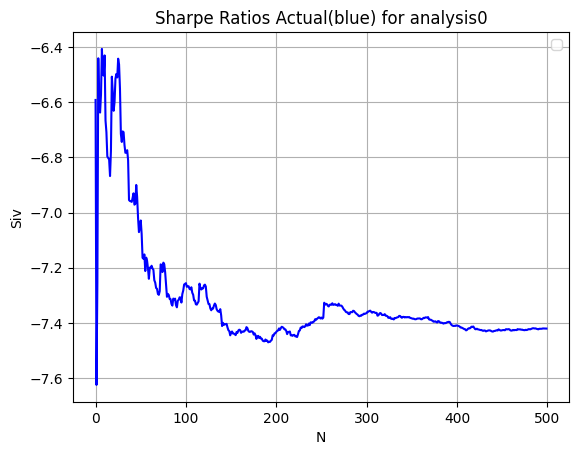

In [98]:
#sum returns for each portfolio:
port_returns_actual1 = allports.sum(axis=1).tolist() # r1    returns for month 1 (ie: Aug returns if predicting for Sep)
stdev1 = allports.std(axis=1).tolist() # SD1    for month 1

#ivports   = IV ports looking into month2:    #using Stock/Port weights of month 1
port_returns_actual2 = allports2.sum(axis=1).tolist() # r2 month 2 (ie: Sep returns if predicting for Sep)
stdev2 = allports2.std(axis=1).tolist()


#print(port_returns_actual1)
#Siv3 = [(x - (RFR)) / y for x, y in zip(port_returns_actual1, stdevaug)]
Siv2 = [(x - (RFR/100)) / y for x, y in zip(port_returns_actual1, ivports)]
Sact2 = [(x - (RFR/100)) / y for x, y in zip(port_returns_actual2, stdev2)]

#plt.plot(Siv2, color='red')
plt.plot(Sact2, color='blue')
plt.grid(True)
plt.legend()
plt.title("Sharpe Ratios Actual(blue) for analysis"+str(AnalysisNumber))
plt.xlabel("N")
plt.ylabel("Siv")
plt.show()

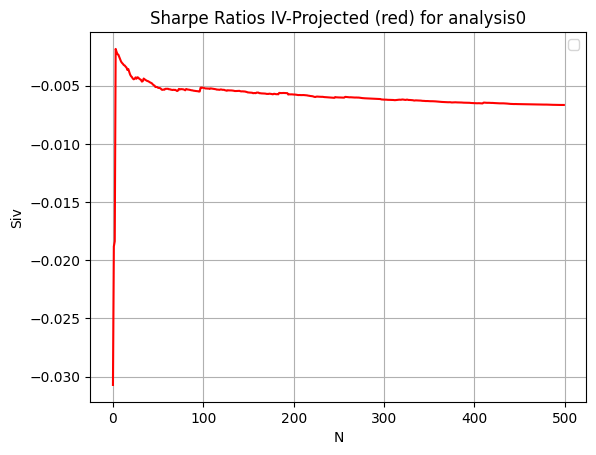

In [99]:
plt.plot(Siv2, color='red')
#plt.plot(Sact2, color='blue')
plt.grid(True)
plt.legend()
plt.title("Sharpe Ratios IV-Projected (red) for analysis"+str(AnalysisNumber))
plt.xlabel("N")
plt.ylabel("Siv")
plt.show()

In [100]:
rankSiv2 = sorted(range(len(Siv2)), key=lambda i: Siv2[i], reverse=True)
print(rankSiv2)
rankSact2 = sorted(range(len(Sact2)), key=lambda i: Sact2[i], reverse=True)
print(rankSact2)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 16, 18, 19, 20, 21, 27, 25, 28, 22, 34, 29, 26, 24, 23, 35, 30, 31, 36, 37, 38, 33, 39, 32, 40, 41, 42, 43, 44, 45, 46, 48, 47, 49, 98, 97, 99, 100, 50, 51, 101, 52, 102, 108, 104, 106, 109, 103, 105, 110, 53, 61, 59, 58, 111, 60, 73, 107, 112, 81, 76, 75, 77, 113, 114, 63, 82, 62, 78, 119, 74, 120, 56, 116, 83, 115, 84, 64, 117, 54, 57, 79, 67, 121, 122, 65, 55, 118, 123, 69, 85, 68, 66, 86, 127, 124, 87, 80, 130, 88, 129, 128, 125, 131, 132, 70, 72, 133, 89, 126, 139, 90, 134, 140, 138, 91, 137, 71, 135, 92, 136, 93, 141, 94, 144, 143, 142, 146, 96, 95, 145, 147, 148, 149, 150, 151, 152, 159, 161, 153, 160, 154, 184, 188, 189, 185, 157, 190, 187, 191, 186, 156, 193, 155, 192, 163, 162, 158, 164, 166, 165, 167, 168, 169, 173, 174, 178, 179, 170, 175, 171, 172, 180, 182, 176, 181, 195, 183, 177, 198, 197, 196, 199, 201, 200, 194, 202, 203, 204, 207, 206, 211, 209, 205, 210, 208, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 226, 227

In [101]:
rankdf = pd.DataFrame()
rankdf['Siv'] = rankSiv2
rankdf['Sact'] = rankSact2
rankdf['ivports'] = ivports
rankdf['stdev2'] = stdev2
#take predicted best N portfolio, and get the actual returns for that portfolio
bestNpred = rankSiv2[0]
#print( allports2.iloc[bestNpred-1].values)
act4best = pd.DataFrame()
act4best['returns'] = allports2.iloc[bestNpred-1].values
print(rankdf)
print(act4best)



     Siv  Sact     ivports    stdev2
0      3     7   10.169182  0.190549
1      4    10   25.479148  0.158555
2      5     3   27.574588  0.163587
3      6    25  289.346077  0.166668
4      7    26  259.417759  0.164519
..   ...   ...         ...       ...
495  498   187   53.145657  0.113623
496  499   192   53.130890  0.113625
497    2   193   53.117895  0.113613
498    1   191   53.107650  0.113614
499    0     1   53.098218  0.113612

[500 rows x 4 columns]
     returns
0   0.025570
1  -0.121184
2   0.000000
3   0.000000
4   0.000000
5  -0.097641
6   0.164981
7  -0.030712
8   0.219711
9   0.000000
10  0.000000
11  0.250586
12 -0.601153
13  0.075730
14 -0.213938
15 -0.105911
16  0.000000
17  0.000000
18  0.127690
19 -0.004279
20 -0.204718
21 -0.022821
22 -0.176796
23  0.000000
24  0.000000
25  0.030402
26 -0.000355
27  0.081515
28 -0.326611
29 -0.232221
30  0.000000


In [102]:
text = 'rank'+str(AnalysisNumber)
file = '/content/drive/My Drive/'
ext = '.csv'
rankdf.to_csv(file+text+ext, index=False)

text = 'act4best'+str(AnalysisNumber)
file = '/content/drive/My Drive/'
ext = '.csv'
act4best.to_csv(file+text+ext, index=False)